In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [30]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


## Data Exploration

In [31]:
dataset.shape

(10, 3)

In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


## Missing Values

In [33]:
dataset.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

<Axes: >

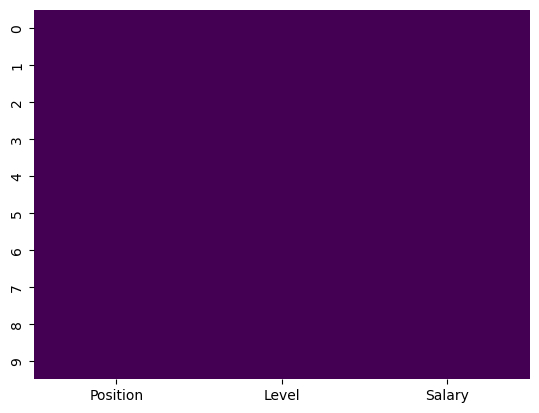

In [34]:
sns.heatmap(dataset.isnull(), cbar=False, cmap='viridis')

## Unique values

In [35]:
for col in dataset.columns:
    print(col, dataset[col].unique(), sep='\n', end='\n\n')

Position
['Business Analyst' 'Junior Consultant' 'Senior Consultant' 'Manager'
 'Country Manager' 'Region Manager' 'Partner' 'Senior Partner' 'C-level'
 'CEO']

Level
[ 1  2  3  4  5  6  7  8  9 10]

Salary
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]



In [36]:
for col in dataset.columns:
    print('{} - {} labels'.format(col, dataset[col].value_counts().sum()))

Position - 10 labels
Level - 10 labels
Salary - 10 labels


## Dependent & Independent variables

In [37]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [38]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [39]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [40]:
y = y.reshape(len(y), 1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

## Feature Scaling

In [41]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [42]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [43]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

## Model Building

In [44]:
from sklearn.svm import SVR
model = SVR(kernel = 'rbf')

In [45]:
model.fit(X, y)

SVR()

In [46]:
y_pred = model.predict(X)

In [47]:
y_pred

array([-0.6197853 , -0.62924694, -0.56788994, -0.49732233, -0.44690338,
       -0.36617206, -0.14115569,  0.28557658,  0.78226531,  1.08559794])

In [54]:
# sc_y.inverse_transform(model.predict(sc_X.transform([[6.5]])).reshape(-1, 1))
y_pred = sc_y.inverse_transform(model.predict(X).reshape(-1, 1)).round()

In [55]:
y_pred

array([[ 73474.],
       [ 70787.],
       [ 88213.],
       [108255.],
       [122575.],
       [145503.],
       [209410.],
       [330607.],
       [471672.],
       [557822.]])

In [57]:
# from sklearn.metrics import confusion_matrix
# confusion_matrix(y, y_pred)

In [58]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

-75289590573.51556